In [3]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np
from pathlib import Path

In [9]:
with open("data/processed/ae_processed_test.json", "r") as f:
    j = json.load(f)
entropies = [o["entropy"] for o in j]
pl = [len(o["profile"]) for o in j]

In [14]:
threshold = np.percentile(entropies, 75)

high_entropy_indices = [i for i, e in enumerate(entropies) if e > threshold]

e = [entropies[i] for i in high_entropy_indices]
p = [pl[i] for i in high_entropy_indices]

In [16]:
np.mean(p), np.min(p)

(128.44, 10)

In [11]:
nopers_path = Path("data/scores/nopers/")
asym_path = Path("data/scores/rag/asym")
full_path = Path("data/scores/rag/full_profile")

ae_scores = {"nopers": [], "asym": [], "full": []}
lp_scores = {"nopers": [], "asym": [], "full": []}
sc_scores = {"nopers": [], "asym": [], "full": []}
for ent in [75, 80, 85, 90, 95]:
    nopers = [nopers_path / f for f in os.listdir(nopers_path) if f.endswith(f"{ent}_test.json")]
    asym = [asym_path / f for f in os.listdir(asym_path) if f.endswith(f"{ent}_10.json")]
    full = [full_path / f for f in os.listdir(full_path) if f.endswith(f"{ent}_10.json")]

    for f in nopers:
        with open(f, "r") as jf:
            obj = json.load(jf)
        
        if f.name[:2] == "ae":
            ae_scores["nopers"].append(obj["score"])
        elif f.name[:2] == "lp":
            lp_scores["nopers"].append(obj["score"])
        elif f.name[:2] == "sc":
            sc_scores["nopers"].append(obj["score"])

    for f in asym:
        with open(f, "r") as jf:
            obj = json.load(jf)
        
        if f.name[:2] == "ae":
            ae_scores["asym"].append(obj["score"])
        elif f.name[:2] == "lp":
            lp_scores["asym"].append(obj["score"])
        elif f.name[:2] == "sc":
            sc_scores["asym"].append(obj["score"])
    
    for f in full:
        with open(f, "r") as jf:
            obj = json.load(jf)
        
        if f.name[:2] == "ae":
            ae_scores["full"].append(obj["score"])
        elif f.name[:2] == "lp":
            lp_scores["full"].append(obj["score"])
        elif f.name[:2] == "sc":
            sc_scores["full"].append(obj["score"])


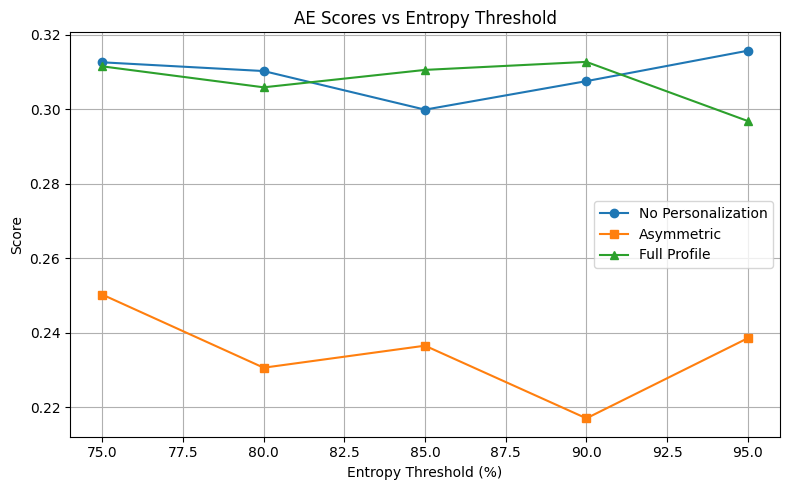

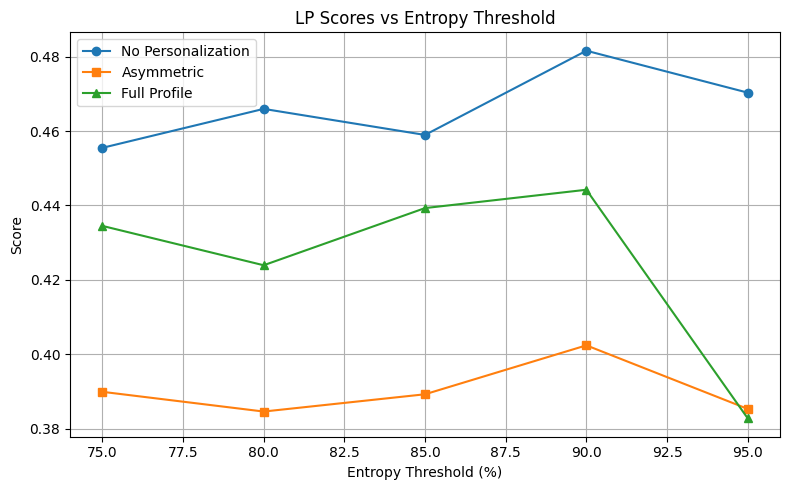

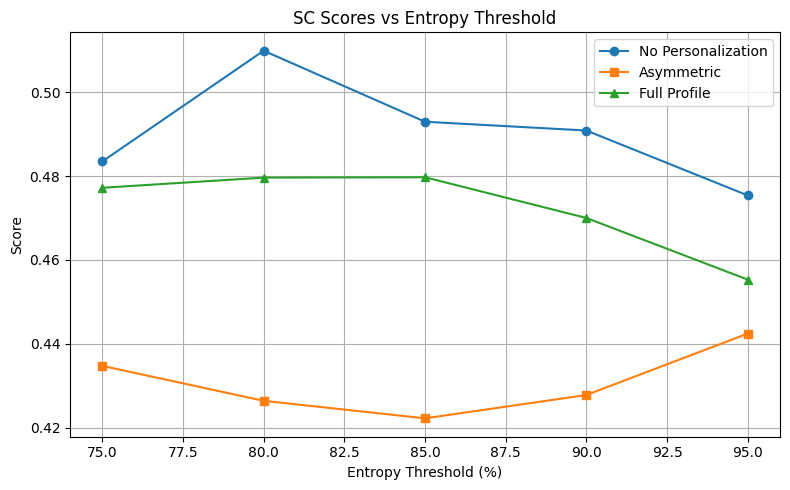

In [12]:
# x-axis values: entropy thresholds
entropy_levels = [75, 80, 85, 90, 95]

# Plot AE scores
plt.figure(figsize=(8, 5))
plt.plot(entropy_levels, ae_scores["nopers"], marker='o', label="No Personalization")
plt.plot(entropy_levels, ae_scores["asym"], marker='s', label="Asymmetric")
plt.plot(entropy_levels, ae_scores["full"], marker='^', label="Full Profile")
plt.title("AE Scores vs Entropy Threshold")
plt.xlabel("Entropy Threshold (%)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot LP scores
plt.figure(figsize=(8, 5))
plt.plot(entropy_levels, lp_scores["nopers"], marker='o', label="No Personalization")
plt.plot(entropy_levels, lp_scores["asym"], marker='s', label="Asymmetric")
plt.plot(entropy_levels, lp_scores["full"], marker='^', label="Full Profile")
plt.title("LP Scores vs Entropy Threshold")
plt.xlabel("Entropy Threshold (%)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot SC scores
plt.figure(figsize=(8, 5))
plt.plot(entropy_levels, sc_scores["nopers"], marker='o', label="No Personalization")
plt.plot(entropy_levels, sc_scores["asym"], marker='s', label="Asymmetric")
plt.plot(entropy_levels, sc_scores["full"], marker='^', label="Full Profile")
plt.title("SC Scores vs Entropy Threshold")
plt.xlabel("Entropy Threshold (%)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
d_path = Path("data/scores/rag/full_profile/")
files = os.listdir(d_path)
ae_scores = [0.2335]
lp_scores = [0.4035]
sc_scores = [0.4347]
for n in range(1, 21):
    files_n = [f for f in files if f.endswith(f"test_20_limit_{n}_scores.json")]

    for file in files_n:
        with open(d_path / file, "r") as f:
            df = json.load(f)
        score = df["score"]

        if file.startswith("ae"):
            ae_scores.append(score)            
        elif file.startswith("lp"):
            lp_scores.append(score)
        elif file.startswith("sc"):
            sc_scores.append(score)

In [15]:
len(ae_scores), len(lp_scores), len(sc_scores)

(21, 21, 21)

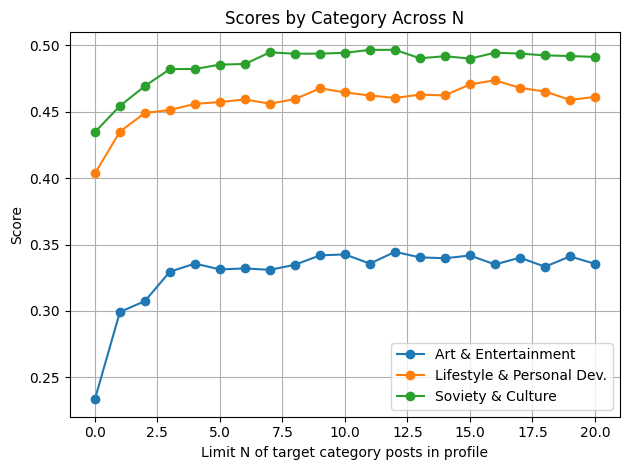

In [16]:
x = list(range(0, 21))
plt.plot(x, ae_scores, label="Art & Entertainment", marker="o")
plt.plot(x, lp_scores, label="Lifestyle & Personal Dev.", marker="o")
plt.plot(x, sc_scores, label="Soviety & Culture", marker="o")
plt.xlabel("Limit N of target category posts in profile")
plt.ylabel("Score")
plt.title("Scores by Category Across N")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
asym_files = os.listdir("data/scores/rag/asym")
full_files = os.listdir("data/scores/rag/full_profile")

In [3]:
asym_macros = [(0,0.4112)]
full_macros = [(0,0.4112)]
for n in [2, 4, 6, 8, 10]:
    asym_n = ["data/scores/rag/asym/" + f for f in asym_files if f.endswith(f"75_{n}.json")]
    full_n = ["data/scores/rag/full_profile/" + f for f in full_files if f.endswith(f"75_{n}.json")]

    asym_m = 0
    for f in asym_n:
        with open(f, "r") as jf:
            ob = json.load(jf)
        asym_m += ob["score"]
    asym_m /= 3
    
    full_m = 0
    for f in full_n:
        with open(f, "r") as jf:
            ob = json.load(jf)
        full_m += ob["score"]
    full_m /= 3

    asym_macros.append((n, asym_m))
    full_macros.append((n, full_m))

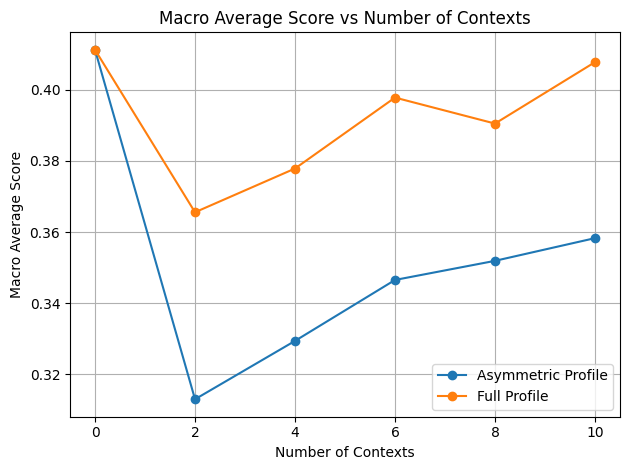

In [4]:
asym_x, asym_y = zip(*asym_macros)
full_x, full_y = zip(*full_macros)

plt.plot(asym_x, asym_y, label="Asymmetric Profile", marker="o")
plt.plot(full_x, full_y, label="Full Profile", marker="o")
plt.xticks([0, 2, 4, 6, 8, 10])
plt.xlabel("Number of Contexts")
plt.ylabel("Macro Average Score")
plt.title("Macro Average Score vs Number of Contexts")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()